# GeoPandas

In [1]:
# Importació
import geopandas as gpd

## Estructures de dades

In [2]:
# Objectes geomètrics
from shapely.geometry import Point, Polygon

### GeoSeries

In [3]:
# Constructor
figures = gpd.GeoSeries([Polygon([(0,0), (2,0), (0,2)]),
                          Polygon([(2,2), (4,2), (4,4), (2,4)])])
figures

0    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 0....
1    POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....
dtype: geometry

**Atributs**

In [4]:
figures.area

0    2.0
1    4.0
dtype: float64

In [5]:
figures.bounds

,minx,miny,maxx,maxy
0,0.0,0.0,2.0,2.0
1,2.0,2.0,4.0,4.0


In [6]:
figures.total_bounds

array([0., 0., 4., 4.])

In [7]:
figures.geom_type

0    Polygon
1    Polygon
dtype: object

**Mètodes:**

In [8]:
figures.distance(Point((0,0)))

0    0.000000
1    2.828427
dtype: float64

In [9]:
figures.centroid

0    POINT (0.66667 0.66667)
1    POINT (3.00000 3.00000)
dtype: geometry

In [10]:
figures.representative_point()

0    POINT (0.50000 1.00000)
1    POINT (3.00000 3.00000)
dtype: geometry

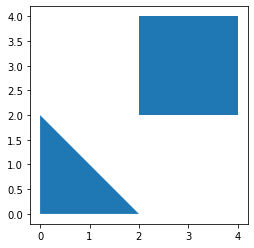

In [11]:
figures.plot()

In [12]:
figures.intersects(Point((1,1)))

0     True
1    False
dtype: bool

### GeoDataFrame

In [13]:
# Constructor
gdf = gpd.GeoDataFrame({'figures':['triangle','quadrat'], 'geometry':figures})

# Creació d'un nou atribut
gdf['area'] = gdf.area

gdf

,figures,geometry,area
0,triangle,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 0....",2.0
1,quadrat,"POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....",4.0


In [14]:
# Assignació de la columna 'geometry'
gdf = gdf.rename(columns={'geometry': 'formes'}).set_geometry('formes')
gdf.geometry.name

'formes'

## Entrada i sortida de dades

In [15]:
# Lectura de fitxer
protected_areas = gpd.read_file('fitxers/protected_areas.shp')
protected_areas

,full_id,osm_id,osm_type,boundary,is_in,leisure,name,type,wikidata,wikipedia,landuse,name_de,sagns_id,website,geometry
0,r2855697,2855697,relation,protected_area,"Western Cape, South Africa",nature_reserve,Bontebok National Park,boundary,Q892884,en:Bontebok National Park,None,None,None,None,"POLYGON ((20.46152 -34.04129, 20.47231 -34.050..."
1,w187055916,187055916,way,protected_area,"Western Cape, South Africa",nature_reserve,Marloth Nature Reserve,None,None,None,conservation,Naturschutzgebiet Marloth,104044,http://capenature.co.za/reserves/marloth-natur...,"POLYGON ((20.38984 -33.93760, 20.44396 -33.942..."


In [16]:
# Lectura d'una URL
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Selecció de dades

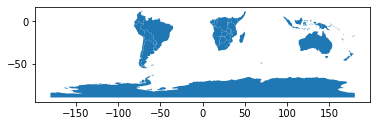

In [17]:
# Selector geomètric
world.cx[:,:0].plot()

## Visualització de dades

### Mapes de color

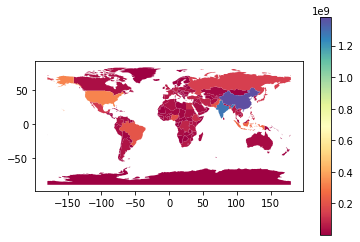

In [18]:
world.plot(column='pop_est', legend=True, cmap='Spectral')

### Mapes amb capes

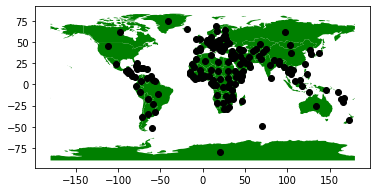

In [19]:
base = world.plot(color='green')
world.centroid.plot(ax=base, color='black')

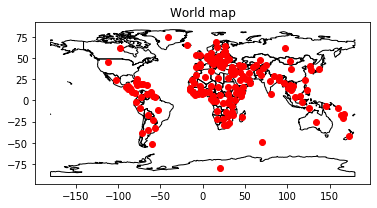

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

world.plot(ax=ax, color='none', edgecolor='black')
world.centroid.plot(ax=ax, color='red')
ax.set_title("World map")

plt.show()

## Manipulacions geomètriques


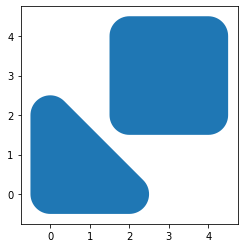

In [21]:
figures.buffer(0.5).plot()

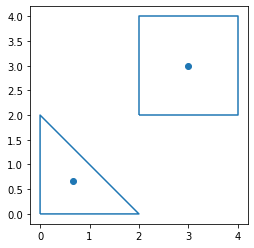

In [22]:
contorn = figures.boundary.plot()
figures.centroid.plot(ax=contorn)

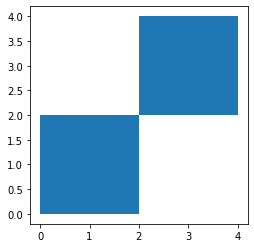

In [23]:
figures.envelope.plot()

**Transformacions afins**

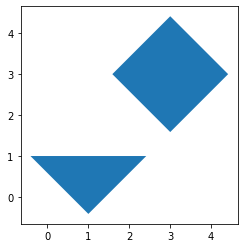

In [24]:
figures.rotate(45).plot()

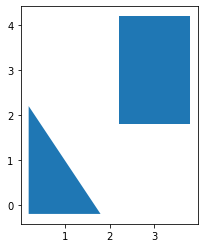

In [25]:
figures.scale(0.8, 1.2).plot()

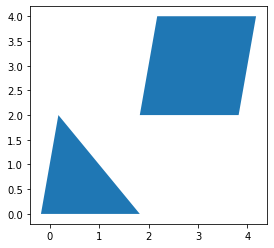

In [26]:
figures.skew(10).plot()

## Operacions entre conjunts sobreposats

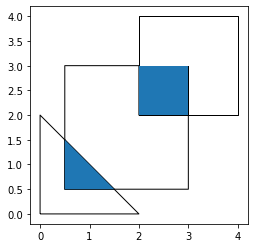

In [27]:
quadrat = gpd.GeoSeries([Polygon([(0.5,0.5), (3,0.5), (3,3), (0.5,3)])])

df1 = gpd.GeoDataFrame({'geometry':figures, 'formes':[1,2]})
df2 = gpd.GeoDataFrame({'geometry':quadrat, 'formes':[1]})

unio = gpd.overlay(df1, df2, how='union')
interseccio = gpd.overlay(df1, df2, how='intersection')

base = unio.plot(color='none', edgecolor='black')
interseccio.plot(ax=base)

## Agregació

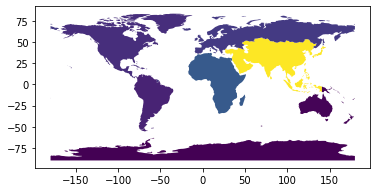

In [28]:
continents = world.dissolve(by='continent', aggfunc='sum')

continents.plot(column='pop_est')